In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('feature_engineered_data.csv')

In [3]:
dataset.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CLUSTER
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,1
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,1
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,1
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,1
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68214 entries, 0 to 68213
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AT       68214 non-null  float64
 1   AP       68214 non-null  float64
 2   AH       68214 non-null  float64
 3   AFDP     68214 non-null  float64
 4   GTEP     68214 non-null  float64
 5   TIT      68214 non-null  float64
 6   TAT      68214 non-null  float64
 7   TEY      68214 non-null  float64
 8   CDP      68214 non-null  float64
 9   CLUSTER  68214 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 5.2 MB


In [5]:
dataset['CLUSTER'].value_counts()

2    23504
1    22355
0    22355
Name: CLUSTER, dtype: int64

In [6]:
X_train = dataset.drop('CLUSTER',axis=1)
y_train = dataset['CLUSTER']

## Using Lasso

In [7]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [8]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [9]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False])

In [10]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 9
selected features: 8


In [11]:
selected_feat

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY'], dtype='object')

In [12]:
X_train.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP'], dtype='object')

## Using DecisionTree

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()

In [14]:
model.fit(X_train,y_train)

ExtraTreesRegressor()

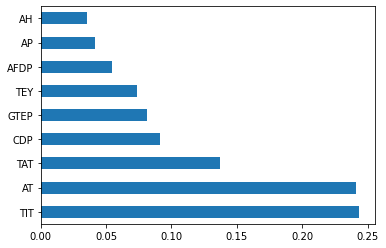

In [20]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

## Using Information Gain

In [16]:
from sklearn.feature_selection import mutual_info_classif

In [17]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.2593935 , 0.36544887, 0.05453963, 0.21157264, 0.38165536,
       0.59695458, 0.42284178, 0.46020529, 0.46885133])

In [18]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

TIT     0.596955
CDP     0.468851
TEY     0.460205
TAT     0.422842
GTEP    0.381655
AP      0.365449
AT      0.259394
AFDP    0.211573
AH      0.054540
dtype: float64

<AxesSubplot:>

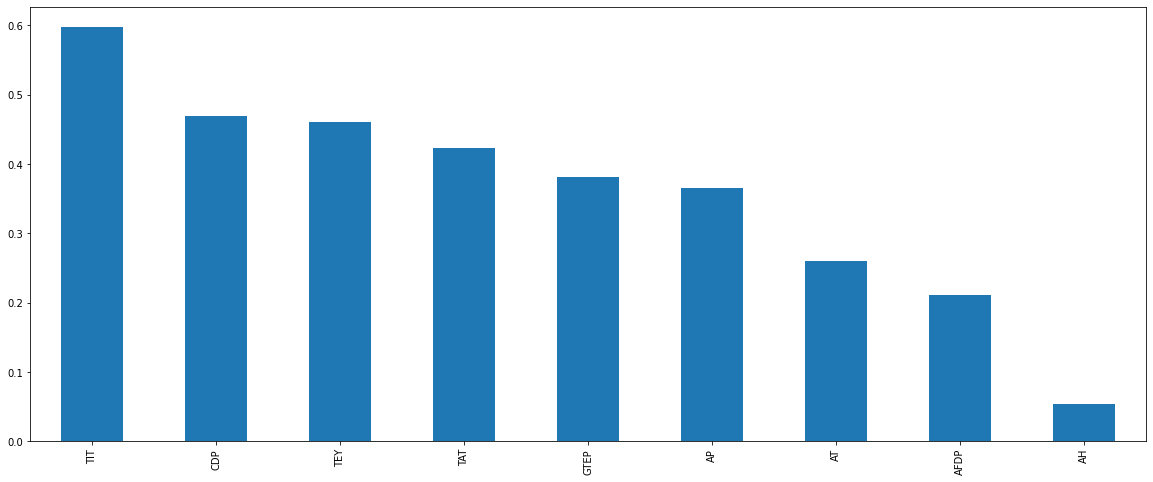

In [19]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

## Using Corelations

<AxesSubplot:>

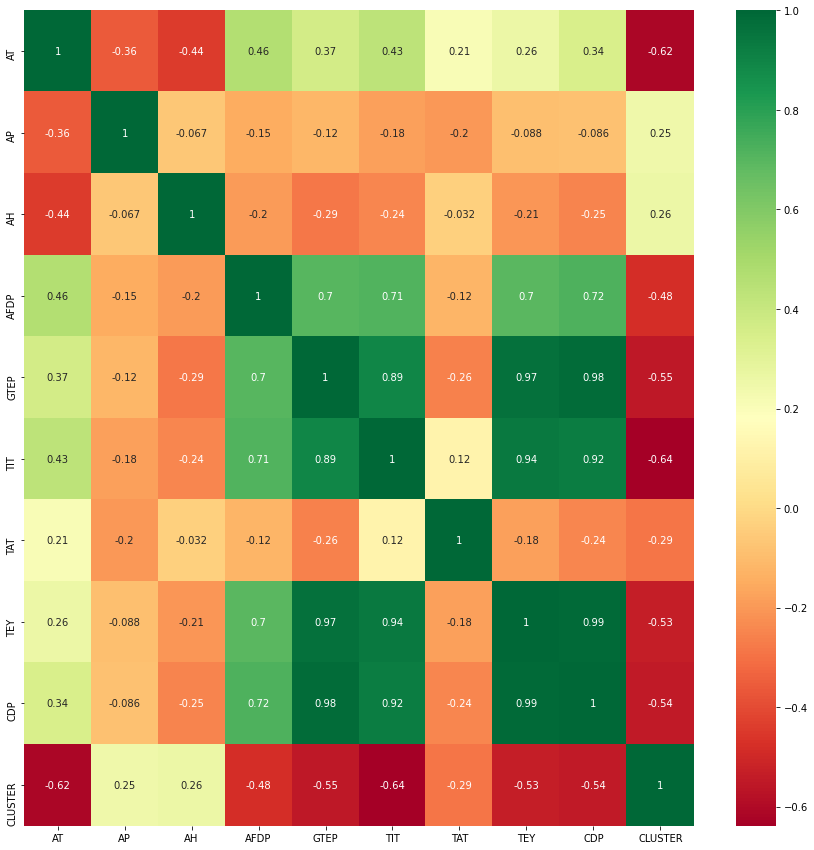

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot=True,cmap="RdYlGn")

## Selecting features considering all the above methods

In [35]:
drop_features = ['AP','AH','AFDP','GTEP','CDP','TIT','AFDP']

In [36]:
feature_selected = dataset.drop(drop_features,axis=1)

In [37]:
feature_selected.head()

,AT,TAT,TEY,CLUSTER
0,4.5878,549.83,134.67,1
1,4.2932,550.05,134.67,1
2,3.9045,550.19,135.10,1
3,3.7436,550.17,135.03,1
4,3.7516,550.00,134.67,1


<AxesSubplot:>

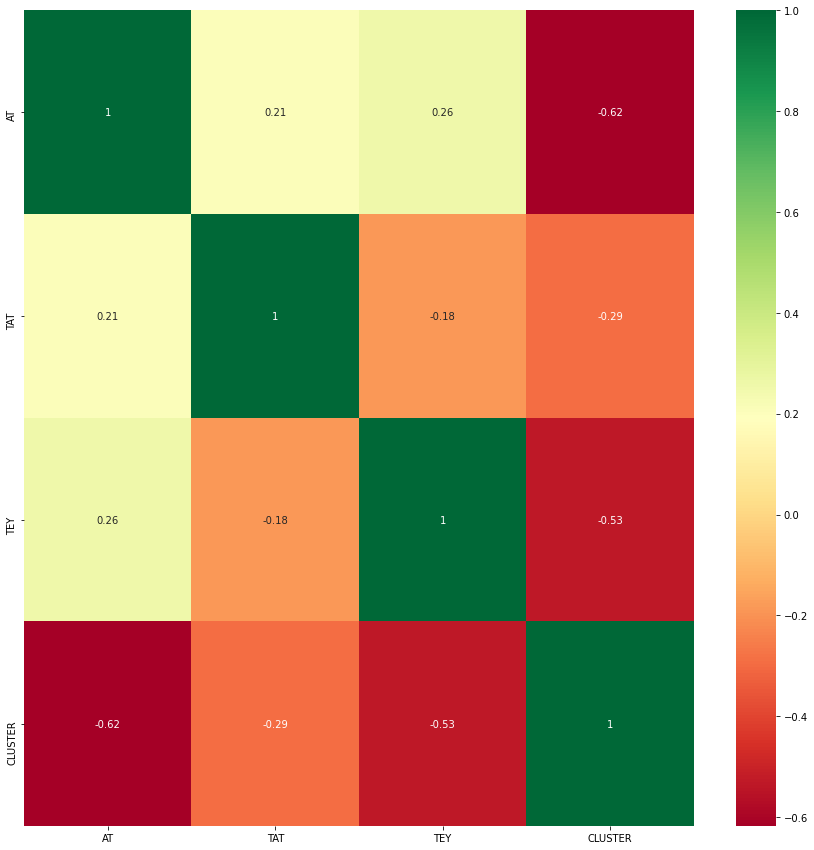

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(feature_selected.corr(),annot=True,cmap="RdYlGn")

In [39]:
feature_selected.to_csv('feature_selected_data.csv',index=False)